# Thông tin
1. MSSV: 20520465
2. Họ tên: Nguyễn Vũ Dương
3. Bài tập: 7
4. Ngày thực hiện: 25/4/2022

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import imutils

In [ ]:
path = '/content/drive/MyDrive/CS231.M21.KHCL/Baitap/Baitap7/images/'

#Xác định và hiển thị các điểm interest/key points của các cặp ảnh

In [ ]:
def show2image(img_src, img_rst, title1, title2):
    plt.figure(figsize=(10, 10))

    plt.subplot(1,2,1)
    plt.title(title1)
    img_src = cv2.cvtColor(img_src, cv2.COLOR_BGR2RGB)
    plt.imshow(img_src, interpolation='bicubic')

    plt.subplot(1, 2, 2)
    plt.title(title2)
    img_rst = cv2.cvtColor(img_rst.astype(np.uint8), cv2.COLOR_BGR2RGB)
    plt.imshow(img_rst, interpolation='bicubic')

In [ ]:
def find_key_point(path ,option=0):
  img = cv2.imread(path)
  if option == 0:
    #ORB
    # Oriented FAST and Rotated BRIEF
    orb = cv2.ORB_create()
    kp, des = orb.detectAndCompute(img, None)
    #img2 = cv2.drawKeypoints(img, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    img2 = cv2.drawKeypoints(img, kp, None, flags=None)
    return img2
  elif option == 1:
    # FAST
    # Features from Accelerated Segment Test
    detector = cv2.FastFeatureDetector_create()
    kp = detector.detect(img, None)
    img2 = cv2.drawKeypoints(img, kp, None, flags=0)
    print( "Threshold: {}".format(detector.getThreshold()) )
    print( "nonmaxSuppression:{}".format(detector.getNonmaxSuppression()) )
    print( "neighborhood: {}".format(detector.getType()) )
    print( "Total Keypoints with nonmaxSuppression: {}".format(len(kp)) )
    return img2
  else:
    raise ValueError("Option is illegal")

In [ ]:
def show_keypoint_2_picture(path1,path2,option=0):
  img1 = find_key_point(path1,option)
  img2 = find_key_point(path2,option)
  show2image(img1,img2,None,None)

##Sử dụng ORB

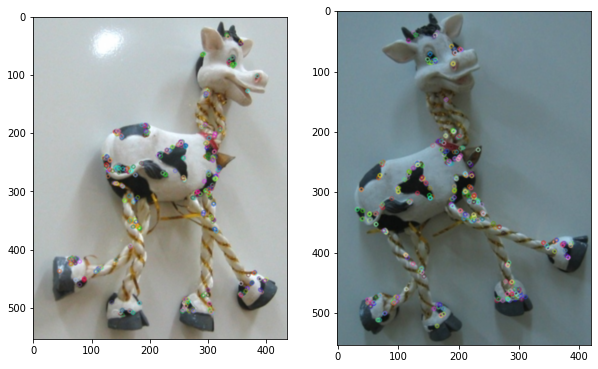

In [ ]:
show_keypoint_2_picture(path+'cow1.jpg',path+'cow2.jpg',0)

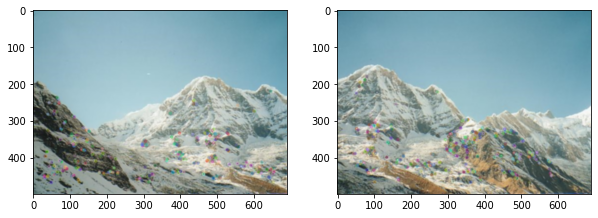

In [ ]:
show_keypoint_2_picture(path+'match1.jpg',path+'match2.jpg',0)

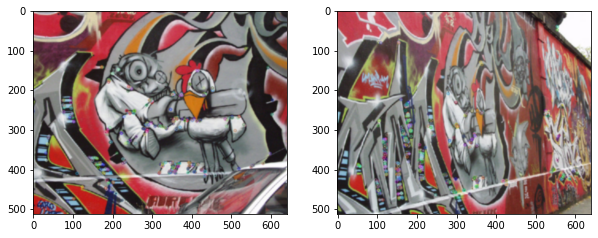

In [ ]:
show_keypoint_2_picture(path+'graf_img1.jpg',path+'graf_img5.jpg',0)

##Sử dụng FAST

Threshold: 10
nonmaxSuppression:True
neighborhood: 2
Total Keypoints with nonmaxSuppression: 1664
Threshold: 10
nonmaxSuppression:True
neighborhood: 2
Total Keypoints with nonmaxSuppression: 1188


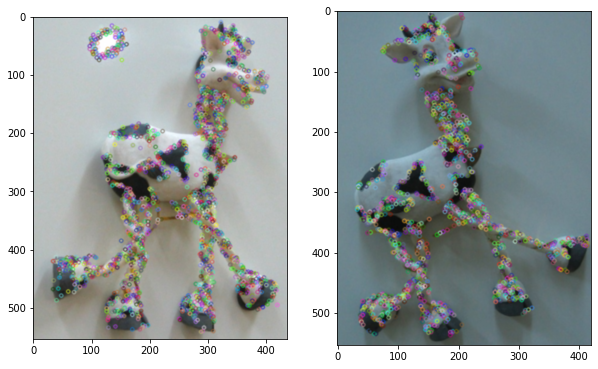

In [ ]:
show_keypoint_2_picture(path+'cow1.jpg',path+'cow2.jpg',1)

Threshold: 10
nonmaxSuppression:True
neighborhood: 2
Total Keypoints with nonmaxSuppression: 10075
Threshold: 10
nonmaxSuppression:True
neighborhood: 2
Total Keypoints with nonmaxSuppression: 10730


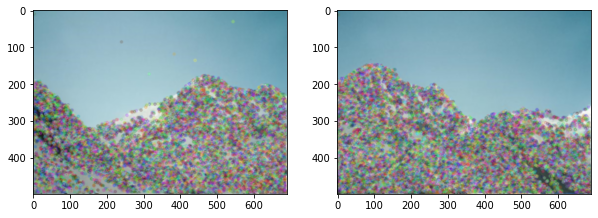

In [ ]:
show_keypoint_2_picture(path+'match1.jpg',path+'match2.jpg',1)

Threshold: 10
nonmaxSuppression:True
neighborhood: 2
Total Keypoints with nonmaxSuppression: 7940
Threshold: 10
nonmaxSuppression:True
neighborhood: 2
Total Keypoints with nonmaxSuppression: 9496


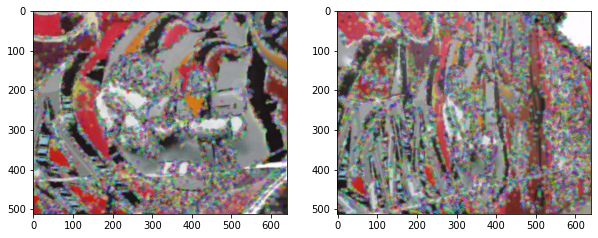

In [ ]:
show_keypoint_2_picture(path+'graf_img1.jpg',path+'graf_img5.jpg',1)

#Feature Matching

In [ ]:
def Feature_Matching(path_img1,path_img2):
  im1 = cv2.imread(path_img1)
  im2 = cv2.imread(path_img2)
  img1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
  img2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
  orb = cv2.ORB_create()
  kp1, des1 = orb.detectAndCompute(img1,None)
  kp2, des2 = orb.detectAndCompute(img2,None)
  bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
  matches = bf.match(des1,des2)
  matches = sorted(matches, key = lambda x:x.distance)
  img3 = cv2.drawMatches(im1,kp1,im2,kp2,matches[:],None, flags=2)
  cv2_imshow(img3)

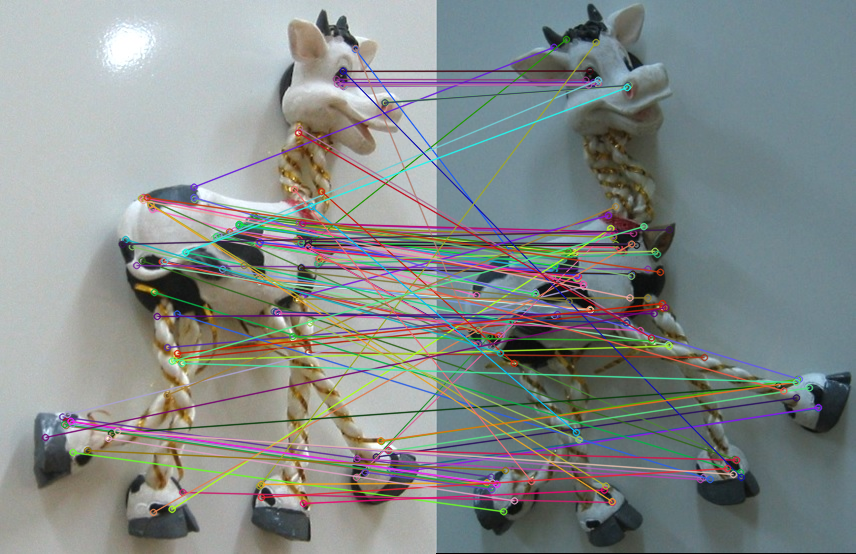

In [ ]:
Feature_Matching(path+'cow1.jpg',path+'cow2.jpg')

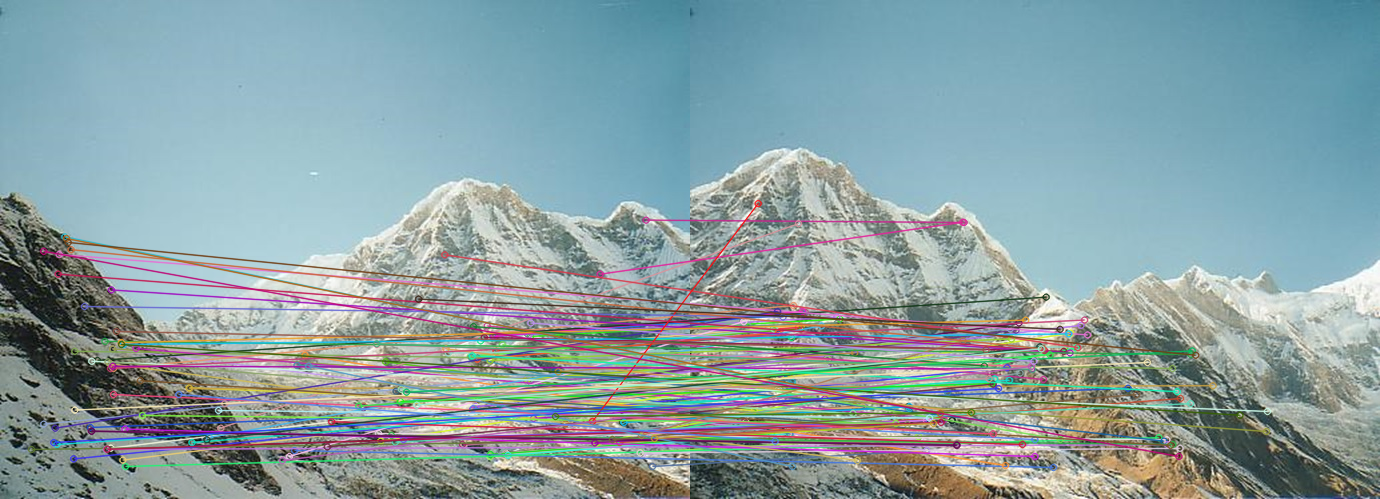

In [ ]:
Feature_Matching(path+'match1.jpg',path+'match2.jpg')

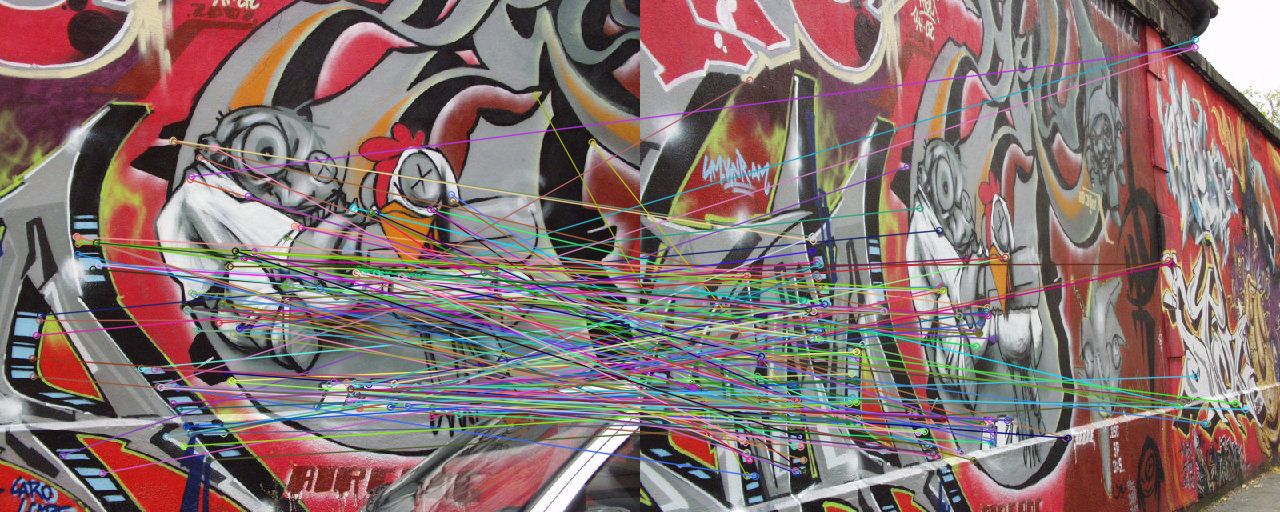

In [ ]:
Feature_Matching(path+'graf_img1.jpg',path+'graf_img5.jpg')